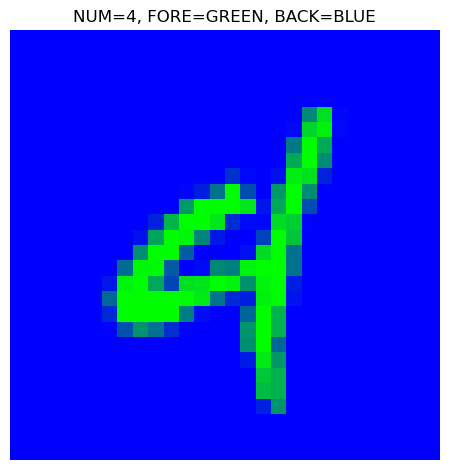

In [1]:
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

np.random.seed(42)  # 난수 생성기의 초기값 설정 (재현성 보장)

# MNIST 데이터셋을 로드합니다.
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 무지개 색상 팔레트를 정의합니다 (7가지 색상).
RAINBOW_COLORS = [
    (255, 0, 0),    # 빨강
    (255, 127, 0),  # 주황
    (255, 255, 0),  # 노랑
    (0, 255, 0),    # 초록
    (0, 0, 255),    # 파랑
    (75, 0, 130),   # 남색 (인디고)
    (148, 0, 211)   # 보라
]

RAINBOW_NAMES = [
    'RED',
    'ORANGE',
    'YELLOW',
    'GREEN',
    'BLUE',
    'INDIGO',
    'VIOLET'
]

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    # return tuple(np.random.randint(0, 256, size=3))
    idx = np.random.randint(0, len(RAINBOW_COLORS))
    return RAINBOW_COLORS[idx], RAINBOW_NAMES[idx]

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGBA')
    return colored_digit


def overlay_digit_on_background(colored_digit):
    """투명도를 제거하고 일관된 배경 이미지를 생성합니다."""
    final_image = colored_digit.convert('RGB')  # 투명도를 제거합니다.
    return final_image

# 전경과 배경 색상이 있는 MNIST 데이터셋을 생성하고 표시합니다.
idx = np.random.randint(0, len(mnist))  # 0~9 사이의 숫자
image, label = mnist[idx]
pil_image = transforms.ToPILImage()(image)

# 전경과 배경 색상을 무작위로 선택합니다.
fg_color, fg_label = get_random_rainbow_color()
bg_color, bg_label = get_random_rainbow_color()

# 전경과 배경 색상이 같지 않도록 보장합니다.
while bg_color == fg_color:
  bg_color, bg_label = get_random_rainbow_color()

# 선택된 색상으로 숫자 이미지를 색칠합니다.
colored_digit = colorize_digit(pil_image, fg_color, bg_color)

if image is not None:
  # 최종 이미지를 표시합니다.
  final_image = overlay_digit_on_background(colored_digit)
  plt.imshow(final_image)
  plt.axis('off')  # 축을 비활성화합니다.
  plt.title(f'NUM={label}, FORE={fg_label}, BACK={bg_label}')

  # 레이아웃을 조정하고 화면에 표시합니다.
  plt.tight_layout()
  plt.show()


In [2]:
#모델 학습을 위한 데이터 적재
#transform = transforms.Compose([transforms.ToTensor()])
#mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

X_color = []
y_bg = []
y_fg = []
y_digit = []

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    # return tuple(np.random.randint(0, 256, size=3))
    idx = np.random.randint(0, len(RAINBOW_COLORS))
    return RAINBOW_COLORS[idx], RAINBOW_NAMES[idx]

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGB')
    return colored_digit

def overlay_digit_on_background(colored_digit):
    """투명도를 제거하고 일관된 배경 이미지를 생성합니다."""
    final_image = colored_digit.convert('RGB')  # 투명도를 제거합니다.
    return final_image

for i in range(len(mnist)):
    image, label = mnist[i]
    pil_image = transforms.ToPILImage()(image)

    # 전경과 배경 색상을 무작위로 선택합니다.
    fg_color, fg_label = get_random_rainbow_color()
    bg_color, bg_label = get_random_rainbow_color()

    # 전경과 배경 색상이 같지 않도록 보장합니다.
    while bg_color == fg_color:
        bg_color, bg_label = get_random_rainbow_color()

    # 전경 및 배경 색상이 적용된 숫자 이미지를 생성합니다.
    colored_digit = colorize_digit(pil_image, fg_color, bg_color)
    #투명도를 제거하고 일관된 배경 이미지를 생성합니다.
    final_image = overlay_digit_on_background(colored_digit)

    # 결과 이미지를 numpy 배열로 변환하고 리스트에 추가합니다.
    X_color.append(np.array(final_image))
    y_digit.append(label)
    y_fg.append(fg_label)
    y_bg.append(bg_label)

#리스트를 Numpy로 변환
X_color = np.array(X_color)
y_digit = np.array(y_digit)
y_fg = np.array(y_fg)
y_bg = np.array(y_bg)

# 데이터 형태를 확인합니다.
print(f"X_color.shape: {X_color.shape}")
print(f"y_digit.shape: {y_digit.shape}")
print(f"y_fg.shape: {y_fg.shape}")
print(f"y_bg.shape: {y_bg.shape}")

X_color.shape: (60000, 28, 28, 3)
y_digit.shape: (60000,)
y_fg.shape: (60000,)
y_bg.shape: (60000,)


In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# X_color를 (60000, 28, 28, 3)에서 (60000, 2352)로 변환 (flatten)
X_color_flatten = np.array(X_color).reshape(-1, 28 * 28 * 3)

# 변환된 X_color_flat의 shape 확인
print(X_color_flatten.shape)  # (60000, 2352)

# X_color와 y_fg, y_bg, y_digit에 대한 훈련/검증 세트를 나누기
X_train, X_test = X_color_flatten[:50000], X_color_flatten[50000:]
y_train_fg, y_test_fg = y_fg[:50000], y_fg[50000:]
y_train_bg, y_test_bg = y_bg[:50000], y_bg[50000:]
y_train_digit, y_test_digit = y_digit[:50000], y_digit[50000:]

# X_train, y_train_fg, y_train_bg, y_train_digit을 한 번에 훈련/검증 세트로 나누기
X_train_split, X_val_split, y_train_fg_split, y_val_fg_split, y_train_bg_split, y_val_bg_split, y_train_digit_split, y_val_digit_split = train_test_split(
    X_train, y_train_fg, y_train_bg, y_train_digit, test_size=0.1, random_state=42
)

(60000, 2352)


In [4]:
# RandomForest 모델
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model_fg = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_bg = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_digit = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
start_time_fg = time.time()
rf_model_fg.fit(X_train_split, y_train_fg_split)
end_time_fg = time.time()

start_time_bg = time.time()
rf_model_bg.fit(X_train_split, y_train_bg_split)
end_time_bg = time.time()

start_time_digit = time.time()
rf_model_digit.fit(X_train_split, y_train_digit_split)
end_time_digit = time.time()

# 검증 데이터로 예측
start_time_fg_val = time.time()
y_val_fg_pred = rf_model_fg.predict(X_val_split)
end_time_fg_val = time.time()

start_time_bg_val = time.time()
y_val_bg_pred = rf_model_bg.predict(X_val_split)
end_time_bg_val = time.time()

start_time_digit_val = time.time()
y_val_digit_pred = rf_model_digit.predict(X_val_split)
end_time_digit_val = time.time()

training_time_fg = end_time_fg - start_time_fg
training_time_bg = end_time_bg - start_time_bg
training_time_digit = end_time_digit - start_time_digit

training_time_fg_val = end_time_fg_val - start_time_fg_val
training_time_bg_val = end_time_bg_val - start_time_bg_val
training_time_digit_val = end_time_digit_val - start_time_digit_val

accuracy_fg_rf = accuracy_score(y_val_fg_split, y_val_fg_pred)
accuracy_bg_rf = accuracy_score(y_val_bg_split, y_val_bg_pred)
accuracy_digit_rf = accuracy_score(y_val_digit_split, y_val_digit_pred)

print(f"Random Forest 전경 색상(fg) 정확도: {accuracy_fg_rf:.4f}")
print(f"Random Forest 전경 색상(fg) 학습 시간: {training_time_fg:.2f} 초")
print(f"Random Forest Validation 전경 색상(fg) 예측 시간: {training_time_fg_val:.2f} 초 \n")

print(f"Random Forest 배경 색상(bg) 정확도: {accuracy_bg_rf:.4f}")
print(f"Random Forest 배경 색상(bg) 학습 시간: {training_time_bg:.2f} 초")
print(f"Random Forest Validation 배경 색상(bg) 예측 시간: {training_time_bg_val:.2f} 초 \n")

print(f"Random Forest 숫자(digit) 정확도: {accuracy_digit_rf:.4f}")
print(f"Random Forest 숫자(digit) 학습 시간: {training_time_digit:.2f} 초")
print(f"Random Forest Validation 숫자(digit) 예측 시간: {training_time_digit_val:.2f} 초")

Random Forest 전경 색상(fg) 정확도: 0.9994
Random Forest 전경 색상(fg) 학습 시간: 27.85 초
Random Forest Validation 전경 색상(fg) 예측 시간: 0.10 초 

Random Forest 배경 색상(bg) 정확도: 1.0000
Random Forest 배경 색상(bg) 학습 시간: 8.99 초
Random Forest Validation 배경 색상(bg) 예측 시간: 0.04 초 

Random Forest 숫자(digit) 정확도: 0.9300
Random Forest 숫자(digit) 학습 시간: 46.43 초
Random Forest Validation 숫자(digit) 예측 시간: 0.18 초


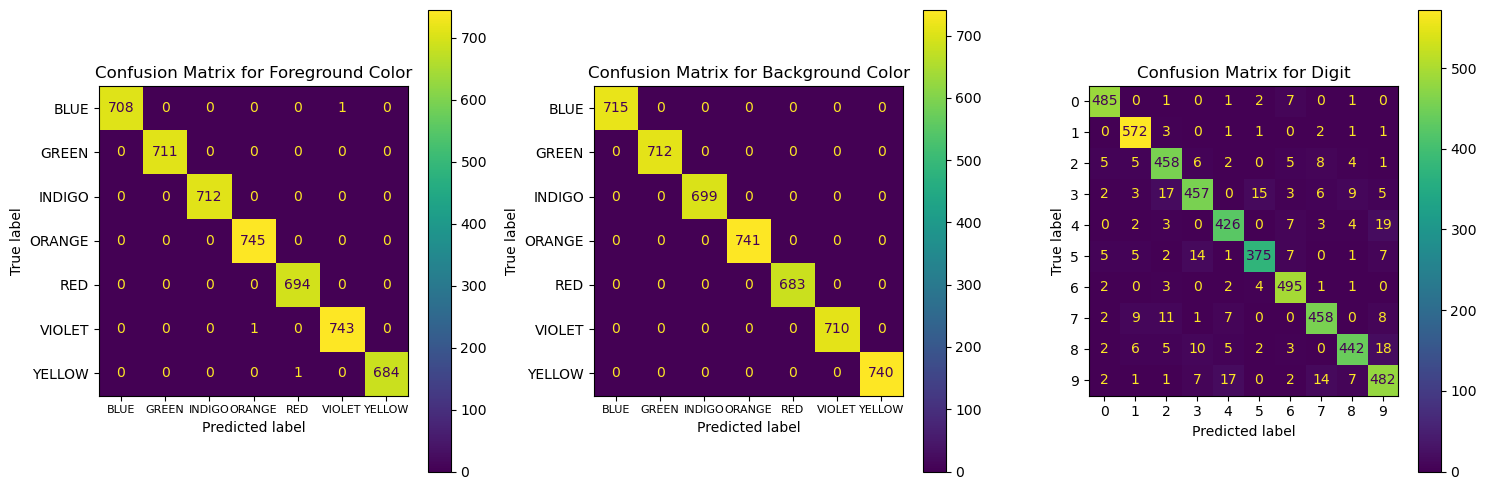

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix 생성
confusion_matrix_fg = confusion_matrix(y_val_fg_split, y_val_fg_pred)
confusion_matrix_bg = confusion_matrix(y_val_bg_split, y_val_bg_pred)
confusion_matrix_digit = confusion_matrix(y_val_digit_split, y_val_digit_pred)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 전경 색상(fg)
cmd_fg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_fg, display_labels=np.unique(y_val_fg_split))
cmd_fg.plot(ax=axes[0])
axes[0].set_title('Confusion Matrix for Foreground Color')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=8) # 폰트 사이즈 조절

# 배경 색상(bg)
cmd_bg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_bg, display_labels=np.unique(y_val_bg_split))
cmd_bg.plot(ax=axes[1])
axes[1].set_title('Confusion Matrix for Background Color')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=8) # 폰트 사이즈 조절

# 숫자(digit)
cmd_digit = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_digit)
cmd_digit.plot(ax=axes[2])
axes[2].set_title('Confusion Matrix for Digit')

# 출력
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import SVC

# SVM 모델 초기화
svm_model_fg = SVC(random_state=42)
svm_model_bg = SVC(random_state=42)
svm_model_digit = SVC(random_state=42)

# 모델 학습 및 시간 측정
start_time_fg = time.time()
svm_model_fg.fit(X_train_split, y_train_fg_split)
train_time_fg = time.time() - start_time_fg

start_time_bg = time.time()
svm_model_bg.fit(X_train_split, y_train_bg_split)
train_time_bg = time.time() - start_time_bg

start_time_digit = time.time()
svm_model_digit.fit(X_train_split, y_train_digit_split)
train_time_digit = time.time() - start_time_digit

print(f"SVM 전경 색상(fg) 학습 시간: {train_time_fg:.4f}초")
print(f"SVM 배경 색상(bg) 학습 시간: {train_time_bg:.4f}초")
print(f"SVM 숫자(digit) 학습 시간: {train_time_digit:.4f}초")

# 검증 데이터로 예측
start_pred_time_fg = time.time()
y_val_fg_pred = svm_model_fg.predict(X_val_split)
pred_time_fg = time.time() - start_pred_time_fg

start_pred_time_bg = time.time()
y_val_bg_pred = svm_model_bg.predict(X_val_split)
pred_time_bg = time.time() - start_pred_time_bg

start_pred_time_digit = time.time()
y_val_digit_pred = svm_model_digit.predict(X_val_split)
pred_time_digit = time.time() - start_pred_time_digit

# 정확도 평가
accuracy_fg_svm = accuracy_score(y_val_fg_split, y_val_fg_pred)
print(f"SVM 전경 색상(fg) 정확도: {accuracy_fg_svm:.4f}")
print(f"SVM 전경 색상(fg) 예측 시간: {pred_time_fg:.4f}초")

accuracy_bg_svm = accuracy_score(y_val_bg_split, y_val_bg_pred)
print(f"SVM 배경 색상(bg) 정확도: {accuracy_bg_svm:.4f}")
print(f"SVM 배경 색상(bg) 예측 시간: {pred_time_bg:.4f}초")

accuracy_digit_svm = accuracy_score(y_val_digit_split, y_val_digit_pred)
print(f"SVM 숫자(digit) 정확도: {accuracy_digit_svm:.4f}")
print(f"SVM 숫자(digit) 예측 시간: {pred_time_digit:.4f}초")


SVM 전경 색상(fg) 학습 시간: 523.4975초
SVM 배경 색상(bg) 학습 시간: 65.1170초
SVM 숫자(digit) 학습 시간: 3026.5705초
SVM 전경 색상(fg) 정확도: 0.9932
SVM 전경 색상(fg) 예측 시간: 136.7881초
SVM 배경 색상(bg) 정확도: 1.0000
SVM 배경 색상(bg) 예측 시간: 10.2458초
SVM 숫자(digit) 정확도: 0.8308
SVM 숫자(digit) 예측 시간: 469.9277초


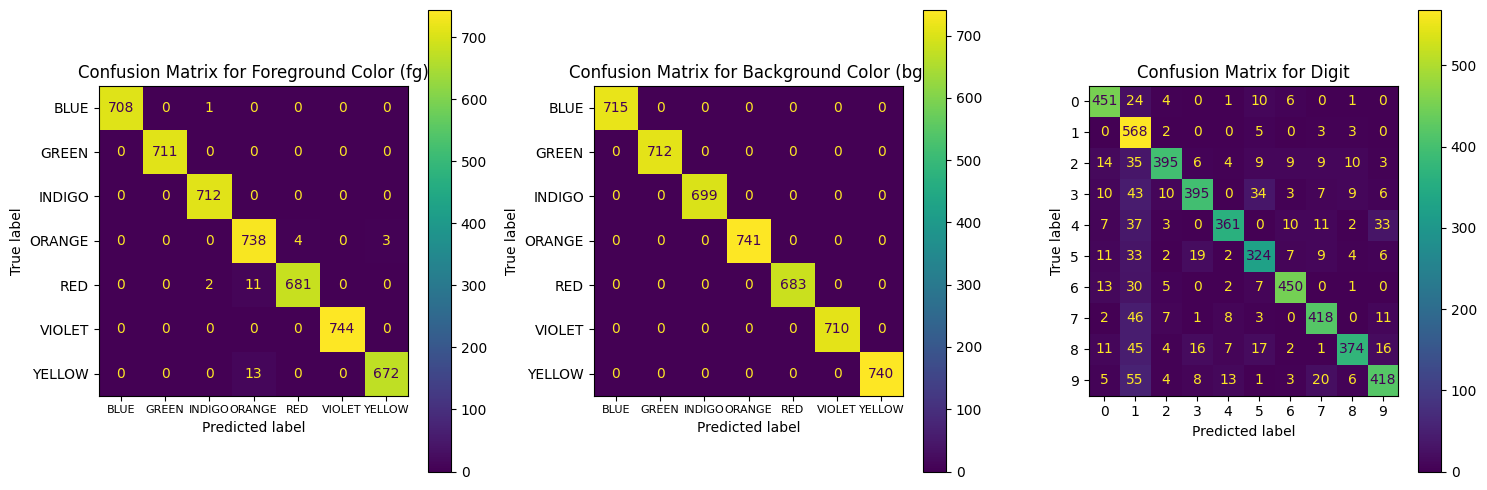

In [ ]:
# Confusion Matrix 생성

confusion_matrix_fg = confusion_matrix(y_val_fg_split, y_val_fg_pred)
confusion_matrix_bg = confusion_matrix(y_val_bg_split, y_val_bg_pred)
confusion_matrix_digit = confusion_matrix(y_val_digit_split, y_val_digit_pred)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 전경 색상(fg)
cmd_fg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_fg, display_labels=np.unique(y_val_fg_split))
cmd_fg.plot(ax=axes[0])
axes[0].set_title('Confusion Matrix for Foreground Color (fg)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=8) # 폰트 사이즈 조절

# 배경 색상(bg)
cmd_bg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_bg, display_labels=np.unique(y_val_bg_split))
cmd_bg.plot(ax=axes[1])
axes[1].set_title('Confusion Matrix for Background Color (bg)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=8) # 폰트 사이즈 조절

# 숫자(digit)
cmd_digit = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_digit)
cmd_digit.plot(ax=axes[2])
axes[2].set_title('Confusion Matrix for Digit')

# 레이아웃 정리
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN 모델 초기화
knn_model_fg = KNeighborsClassifier(n_neighbors=5)
knn_model_bg = KNeighborsClassifier(n_neighbors=5)
knn_model_digit = KNeighborsClassifier(n_neighbors=5)

# 모델 학습 및 시간 측정
start_time_fg = time.time()
knn_model_fg.fit(X_train_split, y_train_fg_split)
train_time_fg = time.time() - start_time_fg

start_time_bg = time.time()
knn_model_bg.fit(X_train_split, y_train_bg_split)
train_time_bg = time.time() - start_time_bg

start_time_digit = time.time()
knn_model_digit.fit(X_train_split, y_train_digit_split)
train_time_digit = time.time() - start_time_digit

print(f"KNN 전경 색상(fg) 학습 시간: {train_time_fg:.4f}초")
print(f"KNN 배경 색상(bg) 학습 시간: {train_time_bg:.4f}초")
print(f"KNN 숫자(digit) 학습 시간: {train_time_digit:.4f}초")

# 검증 데이터로 예측 및 시간 측정
start_pred_time_fg = time.time()
y_val_fg_pred = knn_model_fg.predict(X_val_split)
pred_time_fg = time.time() - start_pred_time_fg

start_pred_time_bg = time.time()
y_val_bg_pred = knn_model_bg.predict(X_val_split)
pred_time_bg = time.time() - start_pred_time_bg

start_pred_time_digit = time.time()
y_val_digit_pred = knn_model_digit.predict(X_val_split)
pred_time_digit = time.time() - start_pred_time_digit

# 정확도 평가
accuracy_fg_knn = accuracy_score(y_val_fg_split, y_val_fg_pred)
print(f"KNN 전경 색상(fg) 정확도: {accuracy_fg_knn:.4f}")
print(f"KNN 전경 색상(fg) 예측 시간: {pred_time_fg:.4f}초")

accuracy_bg_knn = accuracy_score(y_val_bg_split, y_val_bg_pred)
print(f"KNN 배경 색상(bg) 정확도: {accuracy_bg_knn:.4f}")
print(f"KNN 배경 색상(bg) 예측 시간: {pred_time_bg:.4f}초")

accuracy_digit_knn = accuracy_score(y_val_digit_split, y_val_digit_pred)
print(f"KNN 숫자(digit) 정확도: {accuracy_digit_knn:.4f}")
print(f"KNN 숫자(digit) 예측 시간: {pred_time_digit:.4f}초")

KNN 전경 색상(fg) 학습 시간: 0.0063초
KNN 배경 색상(bg) 학습 시간: 0.0071초
KNN 숫자(digit) 학습 시간: 0.0020초
KNN 전경 색상(fg) 정확도: 0.8470
KNN 전경 색상(fg) 예측 시간: 8.6531초
KNN 배경 색상(bg) 정확도: 1.0000
KNN 배경 색상(bg) 예측 시간: 8.5543초
KNN 숫자(digit) 정확도: 0.8972
KNN 숫자(digit) 예측 시간: 8.2002초


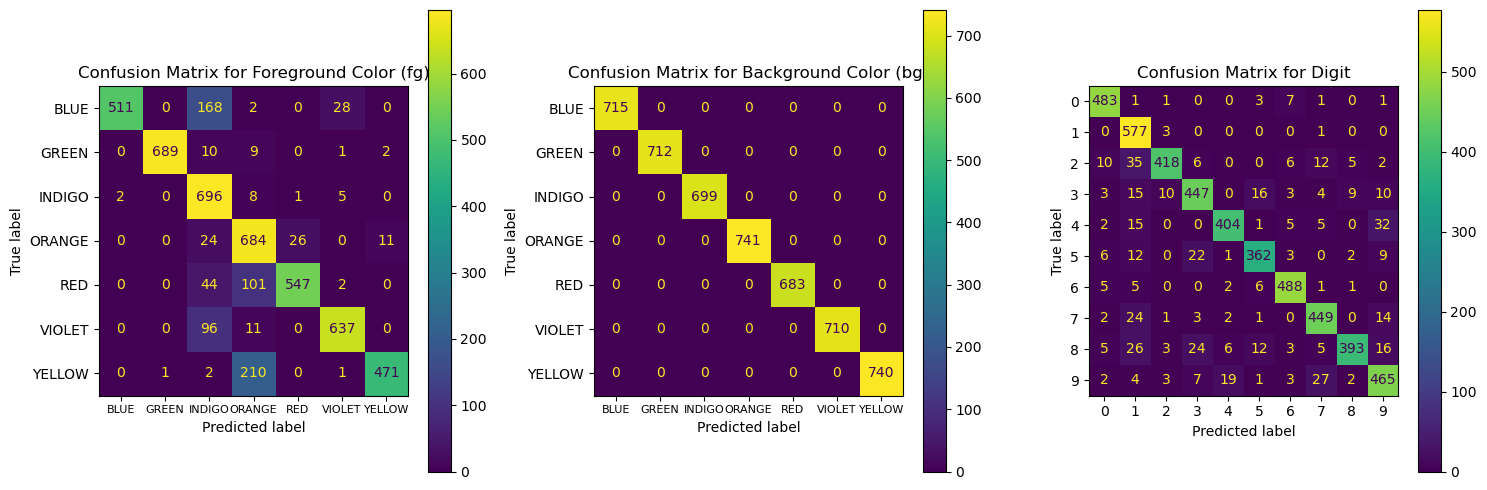

In [ ]:
# Confusion Matrix 생성
confusion_matrix_fg = confusion_matrix(y_val_fg_split, y_val_fg_pred)
confusion_matrix_bg = confusion_matrix(y_val_bg_split, y_val_bg_pred)
confusion_matrix_digit = confusion_matrix(y_val_digit_split, y_val_digit_pred)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 전경 색상(fg)
cmd_fg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_fg, display_labels=np.unique(y_val_fg_split))
cmd_fg.plot(ax=axes[0])
axes[0].set_title('Confusion Matrix for Foreground Color (fg)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=8) # 폰트 사이즈 조절

# 배경 색상(bg)
cmd_bg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_bg, display_labels=np.unique(y_val_bg_split))
cmd_bg.plot(ax=axes[1])
axes[1].set_title('Confusion Matrix for Background Color (bg)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=8)

# 숫자(digit)
cmd_digit = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_digit)
cmd_digit.plot(ax=axes[2])
axes[2].set_title('Confusion Matrix for Digit')

# 레이아웃 정리
plt.tight_layout()
plt.show()

<h1> Data Processing </h1>

In [ ]:
print(X_color_flatten.shape)  # (60000, 2352)
print(X_color.shape) #(60000, 28, 28, 3)

(60000, 2352)
(60000, 28, 28, 3)


Data Binarization
-> 기존 코드는 새로운 MNIST에 새로운 색상을 만들기 때문에 baseline에서 진행한 데이터와 아래 코드에서 진행한 데이터가 갖지 않았음 따라서 기존 bg와 fg를 기억하고 흑백 MNIST dataset을 이진화 후 baseline에서 진행한 데이터와 같은 fg와 bg를 유지할수 있도록 코드 수정

In [ ]:
RAINBOW_MAPPING = {
    'RED': 0,
    'ORANGE': 1,
    'YELLOW': 2,
    'GREEN': 3,
    'BLUE': 4,
    'INDIGO': 5,
    'VIOLET': 6
}

y_fg_int = np.array([RAINBOW_MAPPING[name] for name in y_fg])
y_bg_int = np.array([RAINBOW_MAPPING[name] for name in y_bg])

def colorize_digit_binary(digit_image, fg_color, bg_color):
    # 이미지를 그레이스케일로 변환 및 이진화
    digit = digit_image.convert('L')  # 그레이스케일로 변환
    threshold = 127
    digit = digit.point(lambda p: 255 if p > threshold else 0)  # 이진화 적용

    # 주어진 전경 및 배경 색상 적용
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGB')
    return colored_digit

# 데이터셋 생성 루프
X_color_binarization = []
for i in range(len(mnist)):
    image, label = mnist[i]  # 흑백 MNIST 데이터 가져오기
    pil_image = transforms.ToPILImage()(image)  # 흑백 이미지를 PIL 이미지로 변환

    # y_fg와 y_bg에서 전경 및 배경 색상 선택
    fg_color = RAINBOW_COLORS[y_fg_int[i]]  # y_fg 레이블에 해당하는 색상
    bg_color = RAINBOW_COLORS[y_bg_int[i]]  # y_bg 레이블에 해당하는 색상

    # 이진화 후 전경 및 배경 색상 유지
    binary_colored_digit = colorize_digit_binary(pil_image, fg_color, bg_color)

    #투명도를 제거하고 일관된 배경 이미지를 생성합니다.
    final_image = overlay_digit_on_background(binary_colored_digit)

    # 결과 이미지를 numpy 배열로 변환하고 리스트에 추가
    X_color_binarization.append(np.array(final_image))

# 리스트를 Numpy 배열로 변환
X_color_binarization = np.array(X_color_binarization)

# 데이터 형태를 출력하여 확인
print(f"X_color_binary.shape: {X_color_binarization.shape}")

X_color_binary.shape: (60000, 28, 28, 3)


In [ ]:
# X_color_binarization을 (60000, 28, 28, 3)에서 (60000, 2352)로 변환 (flatten)
X_color_binarization_flatten = np.array(X_color_binarization).reshape(-1, 28 * 28 * 3)

# 변환된 X_color_flat의 shape 확인
print(X_color_binarization_flatten.shape)  # (60000, 2352)

# X_color와 y_fg, y_bg, y_digit에 대한 훈련/검증 세트를 나누기
X_binarization_train, X_binarization_test = X_color_binarization_flatten[:50000], X_color_binarization_flatten[50000:]
y_train_digit, y_test_digit = y_digit[:50000], y_digit[50000:]

# y_train_digit_split , y_val_digit_split, y_test_digit는 그대로 사용
X_binarization_train_split, X_binarization_val_split , y_binarization_train_split, y_binarization_val_split= train_test_split(X_binarization_train, y_train_digit, test_size=0.1, random_state=42)


(60000, 2352)


In [ ]:
# 1. Random Forest 모델 학습 및 검증
# 모델 초기화
RF_binarization_digit = RandomForestClassifier(n_estimators=100, random_state=42)

# 학습 및 시간 측정
start_digit = time.time()
RF_binarization_digit.fit(X_binarization_train_split, y_binarization_train_split)
end_digit = time.time()

# 검증 데이터로 예측
val_start_digit = time.time()
y_digit_pred = RF_binarization_digit.predict(X_binarization_val_split)
val_end_digit = time.time()

# 3. 정확도 계산
accuracy_digit_binarization = accuracy_score(y_binarization_val_split, y_digit_pred)

# 학습 및 예측 시간 계산
training_time_digit_binarization = end_digit - start_digit
validation_time_digit_binarization = val_end_digit - val_start_digit

# 4. 결과 출력
print(f"Data Binarization")
print(f"Random Forest 숫자(digit) 정확도: {accuracy_digit_binarization:.4f}")
print(f"Random Forest 숫자(digit) 학습 시간: {training_time_digit_binarization:.2f} 초")
print(f"Random Forest Validation 숫자(digit) 예측 시간: {validation_time_digit_binarization:.2f} 초")


Data Binarization
Random Forest 숫자(digit) 정확도: 0.9256
Random Forest 숫자(digit) 학습 시간: 38.31 초
Random Forest Validation 숫자(digit) 예측 시간: 0.22 초


Min-Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# X_color_flatten은 이미 flatten되어있음
#X_train_split , X_val_split, X_test
#y_train_digit_split, y_val_digit_split, y_test_digit

# 정규화 (훈련 데이터 기준으로 fit)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)
X_test_scaled = scaler.transform(X_test)

# 최종 데이터 형태 확인
print(f"훈련 데이터 크기: {X_train_scaled.shape}")
print(f"검증 데이터 크기: {X_val_scaled.shape}")
print(f"테스트 데이터 크기: {X_test_scaled.shape}")

훈련 데이터 크기: (45000, 2352)
검증 데이터 크기: (5000, 2352)
테스트 데이터 크기: (10000, 2352)


In [ ]:
import time

# RandomForest 모델 초기화
RF_MinMAX_digit = RandomForestClassifier(n_estimators=100, random_state=42)

# 숫자(digit) 학습 및 시간 측정
start_time_digit = time.time()
RF_MinMAX_digit.fit(X_train_scaled, y_train_digit_split)
end_time_digit = time.time()

# 검증 데이터로 예측
start_time_digit_val = time.time()
y_val_digit_pred = RF_MinMAX_digit.predict(X_val_scaled)
end_time_digit_val = time.time()

# 학습 및 예측 시간 계산
training_time_digit_MinMax = end_time_digit - start_time_digit
validation_time_digit_MinMax = end_time_digit_val - start_time_digit_val

# 정확도 계산
accuracy_digit_rf_MinMax = accuracy_score(y_val_digit_split, y_val_digit_pred)

# 결과 출력
print(f"Data Min-Max Scaling with Random Forest")
print(f"Random Forest 숫자(digit) 정확도: {accuracy_digit_rf_MinMax:.4f}")
print(f"Random Forest 숫자(digit) 학습 시간: {training_time_digit_MinMax:.2f} 초")
print(f"Random Forest Validation 숫자(digit) 예측 시간: {validation_time_digit_MinMax:.2f} 초")

Data Min-Max Scaling with Random Forest
Random Forest 숫자(digit) 정확도: 0.9294
Random Forest 숫자(digit) 학습 시간: 45.97 초
Random Forest Validation 숫자(digit) 예측 시간: 0.18 초


Grayscale

In [ ]:
# X_color 배열을 그레이스케일로 변환
X_grayscale = []

for img in X_color:
    # RGB 이미지를 Grayscale로 변환
    gray_image = Image.fromarray(img).convert('L')
    X_grayscale.append(np.array(gray_image))

X_grayscale = np.array(X_grayscale)

In [ ]:
# 1. 데이터 준비 및 평탄화
# 그레이스케일 데이터의 형태: (n_samples, height, width)
# 평탄화: (n_samples, height * width)
X_grayscale_flatten = X_grayscale.reshape(X_grayscale.shape[0], -1)

# 변환된 X_color_flat의 shape 확인
print(X_grayscale_flatten.shape)  # (60000, 2352)

# X_color와 y_fg, y_bg, y_digit에 대한 훈련/검증 세트를 나누기
X_grayscale_train, X_grayscale_test = X_grayscale_flatten[:50000], X_grayscale_flatten[50000:]
y_grayscale_train, y_grayscale_test = y_digit[:50000], y_digit[50000:]

# y_train_digit_split , y_val_digit_split, y_test_digit는 그대로 사용
X_grayscale_train_split, X_grayscale_val_split , y_grayscale_train_split, y_grayscale_val_split = train_test_split(X_grayscale_train, y_grayscale_train, test_size=0.1, random_state=42)


# 3. Random Forest 모델 학습
# 모델 초기화
RF_grayscale_digit = RandomForestClassifier(n_estimators=100, random_state=42)

# 학습 및 시간 측정 - 숫자(digit)
start_digit = time.time()
RF_grayscale_digit.fit(X_grayscale_train_split, y_grayscale_train_split)
end_digit = time.time()

# 4. 검증 데이터로 예측
val_start_digit = time.time()
y_digit_pred = RF_grayscale_digit.predict(X_grayscale_val_split)
val_end_digit = time.time()

# 5. 정확도 계산
accuracy_digit_grayscale = accuracy_score(y_grayscale_val_split, y_digit_pred)

# 학습 및 예측 시간 계산
training_time_digit_grayscale = end_digit - start_digit
validation_time_digit_grayscale = val_end_digit - val_start_digit

# 6. 결과 출력
print(f"Data Gray Scale")
print(f"Random Forest 숫자(digit) 정확도: {accuracy_digit_grayscale:.4f}")
print(f"Random Forest 숫자(digit) 학습 시간: {training_time_digit_grayscale:.2f} 초")
print(f"Random Forest Validation 숫자(digit) 예측 시간: {validation_time_digit_grayscale:.2f} 초")

(60000, 784)
Data Gray Scale
Random Forest 숫자(digit) 정확도: 0.9182
Random Forest 숫자(digit) 학습 시간: 36.55 초
Random Forest Validation 숫자(digit) 예측 시간: 0.12 초


<h1> Data Augmentation</h1>

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. 1차원 -> 4차원 (증강하기 위해)
def reshape_to_4d(flat_data):
    return flat_data.reshape(-1, 28, 28, 3)

# 2. 4차원 -> 1차원 (RF모델에 적용하기 위해)
def reshape_to_flatten(data_4d):
    return data_4d.reshape(data_4d.shape[0], -1)

# 3. 증강 함수
def augment_data(img_generator, X, y):
    X_4d = reshape_to_4d(X)  # 평탄화된 데이터를 4D로 변환
    augmented_data = img_generator.flow(X_4d, y, batch_size=len(X_4d))
    X_augmented_4d, y_augmented = next(iter(augmented_data))
    X_augmented = reshape_to_flatten(X_augmented_4d)  # 증강 후 평탄화된 데이터로 변화
    return X_augmented, y_augmented

In [7]:
# 회전 각도 리스트 (테스트할 각도 범위)
rotation_angles = [-25, -20, -15, -10, -5, 5, 10, 15, 20, 25]

# 결과 저장 리스트
results = []

# 회전 각도에 따른 증강 및 학습/평가
for angle in rotation_angles:
    print(f"\n===== 테스트 중인 회전 각도: {angle}° =====")

    # ImageDataGenerator 설정
    datagen = ImageDataGenerator(
        rotation_range=angle,
        fill_mode='nearest'
    )

    # 증강 데이터 생성
    aug_X_train, aug_y_train = augment_data(datagen, X_train_split, y_train_digit_split)

    # 원본 데이터와 증강 데이터 결합
    augmented_X_train = np.concatenate([X_train_split, aug_X_train], axis=0)
    augmented_y_train = np.concatenate([y_train_digit_split, aug_y_train], axis=0)

    # Random Forest 모델 선언
    rf_digit = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

    # 모델 학습
    start_time = time.time()
    rf_digit.fit(augmented_X_train, augmented_y_train)
    end_time = time.time()

    training_time = end_time - start_time

    # 검증 데이터 평가
    start_time = time.time()
    y_val_pred = rf_digit.predict(X_val_split)
    val_accuracy = accuracy_score(y_val_digit_split, y_val_pred)
    end_time = time.time()

    validation_time = end_time - start_time

    # 결과 저장
    results.append({'rotation_angle': angle, 'val_accuracy': val_accuracy})
    print(f"  training 시간         : {training_time:.2f}초")
    print(f"  validation 시간       : {validation_time:.2f}초")
    print(f"  검증 데이터 정확도: {val_accuracy:.4f}")

# 최적의 회전 각도 선택
best_result = max(results, key=lambda x: x['val_accuracy'])
print("\n===== 최적 회전 각도 =====")
print(f"최적 회전 각도: {best_result['rotation_angle']}°")
print(f"검증 데이터 정확도: {best_result['val_accuracy']:.4f}")


===== 테스트 중인 회전 각도: -25° =====
  training 시간         : 19.49초
  validation 시간       : 0.40초
  검증 데이터 정확도: 0.9322

===== 테스트 중인 회전 각도: -20° =====
  training 시간         : 19.45초
  validation 시간       : 0.07초
  검증 데이터 정확도: 0.9320

===== 테스트 중인 회전 각도: -15° =====
  training 시간         : 19.54초
  validation 시간       : 0.07초
  검증 데이터 정확도: 0.9328

===== 테스트 중인 회전 각도: -10° =====
  training 시간         : 19.47초
  validation 시간       : 0.07초
  검증 데이터 정확도: 0.9326

===== 테스트 중인 회전 각도: -5° =====
  training 시간         : 19.54초
  validation 시간       : 0.07초
  검증 데이터 정확도: 0.9348

===== 테스트 중인 회전 각도: 5° =====
  training 시간         : 19.54초
  validation 시간       : 0.07초
  검증 데이터 정확도: 0.9360

===== 테스트 중인 회전 각도: 10° =====
  training 시간         : 19.61초
  validation 시간       : 0.07초
  검증 데이터 정확도: 0.9318

===== 테스트 중인 회전 각도: 15° =====
  training 시간         : 19.65초
  validation 시간       : 0.07초
  검증 데이터 정확도: 0.9334

===== 테스트 중인 회전 각도: 20° =====
  training 시간         : 19.98초
  validation 시간       : 0.08초
 

In [8]:
top_angles = sorted(results, key=lambda x: x['val_accuracy'], reverse=True)[:3]

print("\n===== 상위 3개의 회전 각도 =====")
for rank, result in enumerate(top_angles, start=1):
    print(f"{rank}위: 회전 각도 {result['rotation_angle']}°, 검증 정확도 {result['val_accuracy']:.4f}")


===== 상위 3개의 회전 각도 =====
1위: 회전 각도 5°, 검증 정확도 0.9360
2위: 회전 각도 25°, 검증 정확도 0.9352
3위: 회전 각도 -5°, 검증 정확도 0.9348


In [9]:
img_generator = ImageDataGenerator(
    rotation_range=top_angles[0]['rotation_angle'],
    width_shift_range=0.2,
    height_shift_range=0.2,
)

img_generator2 = ImageDataGenerator(
    rotation_range=top_angles[1]['rotation_angle'],
    width_shift_range=0.1,
    height_shift_range=0.1,
)

img_generator3 = ImageDataGenerator(
    rotation_range=top_angles[2]['rotation_angle'],
    width_shift_range=0.05,
    height_shift_range=0.05,
)

# 4. 훈련 데이터 증강
aug1_train_x, aug1_train_y = augment_data(img_generator, X_train_split, y_train_digit_split)
aug2_train_x, aug2_train_y = augment_data(img_generator2, X_train_split, y_train_digit_split)
aug3_train_x, aug3_train_y = augment_data(img_generator3, X_train_split, y_train_digit_split)

# 5. 결합
x_train_combined = np.concatenate((X_train_split, aug1_train_x, aug2_train_x, aug3_train_x))
y_train_combined = np.concatenate((y_train_digit_split, aug1_train_y, aug2_train_y, aug3_train_y))

# 6. 셔플링
shuffle_index = np.random.permutation(len(x_train_combined))
x_train_combined_shff = x_train_combined[shuffle_index]
y_train_combined_shff = y_train_combined[shuffle_index]

# 최종 데이터 크기 확인
print(f"훈련 데이터 크기: {x_train_combined_shff.shape}")
#print(f"검증 데이터 크기: {x_combined_val_shff.shape}")

훈련 데이터 크기: (180000, 2352)


In [10]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# 데이터를 uint8로 변환
x_train_combined_shff = x_train_combined_shff.astype('uint8')
#x_combined_val_shff = x_combined_val_shff.astype('uint8')

# Random Forest 모델 초기화
RF_aug_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
start_time = time.time()
RF_aug_model.fit(x_train_combined_shff, y_train_combined_shff)
end_time = time.time()
training_time = end_time - start_time

# 검증 데이터로 예측
start_time = time.time()

y_val_pred = RF_aug_model.predict(X_val_split)
end_time = time.time()
validation_time = end_time - start_time

# 정확도 계산
accuracy = accuracy_score(y_val_digit_split, y_val_pred)

print(f"Data Augmentation RF model 숫자(digit) 정확도: {accuracy:.4f}")
print(f"Random Forest 숫자(digit) 학습 시간: {training_time:.2f} 초")
print(f"Random Forest Validation 숫자(digit) 예측 시간: {validation_time:.2f} 초")

Data Augmentation RF model 숫자(digit) 정확도: 0.9344
Random Forest 숫자(digit) 학습 시간: 250.51 초
Random Forest Validation 숫자(digit) 예측 시간: 0.33 초


In [11]:
from sklearn.metrics import accuracy_score, classification_report

# 테스트 데이터 예측
y_test_pred = RF_aug_model.predict(X_test)

# 정확도 계산
test_accuracy = accuracy_score(y_test_digit, y_test_pred)

# 정밀도, 재현율, F1-score 보고서 출력
classification_report_str = classification_report(y_test_digit, y_test_pred)

# 결과 출력
print(f"테스트 데이터 정확도: {test_accuracy:.4f}")
print("\n테스트 데이터 분류 리포트:")
print(classification_report_str)

테스트 데이터 정확도: 0.9435

테스트 데이터 분류 리포트:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       991
           1       0.92      0.98      0.95      1064
           2       0.96      0.95      0.95       990
           3       0.93      0.94      0.94      1030
           4       0.96      0.94      0.95       983
           5       0.95      0.90      0.92       915
           6       0.96      0.97      0.96       967
           7       0.94      0.96      0.95      1090
           8       0.96      0.89      0.93      1009
           9       0.90      0.91      0.91       961

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [ ]:
import itertools

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100,200,300],  # 트리 개수
    'max_depth': [10, None],     # 최대 깊이
    'max_features': ['sqrt', 'log2'] # 최대 특징 수
}

# 하이퍼파라미터 조합 생성
param_combinations = list(itertools.product(
    param_grid['n_estimators'],
    param_grid['max_depth'],
    param_grid['max_features']
))

# 결과 저장용 변수
best_params = None
best_accuracy = 0
best_model = None

start_time = time.time()
for params in param_combinations:
    n_estimators, max_depth, max_features = params

    # Random Forest 모델 초기화
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        random_state=42
    )

    # 모델 학습
    model.fit(x_train_combined_shff, y_train_combined_shff)

    # 검증 데이터로 평가
    y_val_pred = model.predict(X_val_split)
    val_accuracy = accuracy_score(y_val_digit_split, y_val_pred)

    # 최적 모델 저장
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_params = params
        best_model = model

end_time = time.time()

# 최적의 파라미터 출력
print("Best parameters found:", {
    'n_estimators': best_params[0],
    'max_depth': best_params[1],
    'max_features': best_params[2]
})
print("Best validation accuracy:", best_accuracy)
print(f"Total Grid Search Time: {(end_time - start_time) / 60:.2f} minutes")

Best parameters found: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Best validation accuracy: 0.9392
Total Grid Search Time: 117.61 minutes


In [ ]:
RF_final = RandomForestClassifier(
    n_estimators=best_params[0],
    max_depth=best_params[1],
    max_features=best_params[2],
    random_state=42
)


# 학습 및 시간 측정
start_time = time.time()
RF_final.fit(x_train_combined_shff, y_train_combined_shff)
end_time = time.time()
training_time = end_time - start_time

# 검증 데이터로 예측
start_time = time.time()
y_val_pred = RF_final.predict(X_val_split)
end_time = time.time()
validation_time = end_time - start_time

# validation 정확도 계산
val_accuracy = accuracy_score(y_val_digit_split, y_val_pred)

# test set 평가
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test_digit, y_test_pred)

print(f"Random Forest 숫자(digit) 학습 시간: {training_time:.2f} 초")
print(f"Random Forest Validation 숫자(digit) 예측 시간: {validation_time:.2f} 초")
print(f"Validation set accuracy with final model: {val_accuracy:.4f}")
print(f"Test set accuracy with final model: {test_accuracy:.4f}")

Random Forest 숫자(digit) 학습 시간: 732.85 초
Random Forest Validation 숫자(digit) 예측 시간: 0.87 초
Validation set accuracy with final model: 0.9392
Test set accuracy with final model: 0.9476


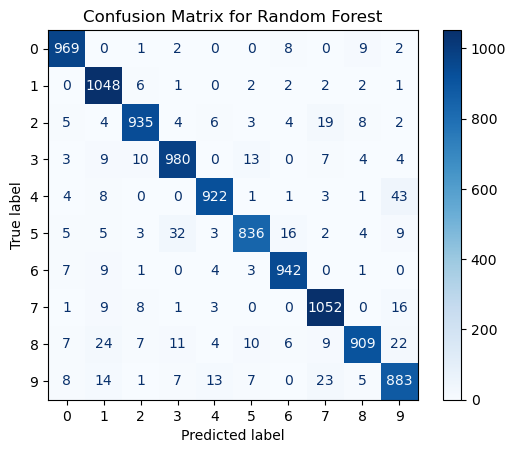

Confusion Matrix:
[[ 969    0    1    2    0    0    8    0    9    2]
 [   0 1048    6    1    0    2    2    2    2    1]
 [   5    4  935    4    6    3    4   19    8    2]
 [   3    9   10  980    0   13    0    7    4    4]
 [   4    8    0    0  922    1    1    3    1   43]
 [   5    5    3   32    3  836   16    2    4    9]
 [   7    9    1    0    4    3  942    0    1    0]
 [   1    9    8    1    3    0    0 1052    0   16]
 [   7   24    7   11    4   10    6    9  909   22]
 [   8   14    1    7   13    7    0   23    5  883]]
Class 0 accuracy: 0.9778
Class 1 accuracy: 0.9850
Class 2 accuracy: 0.9444
Class 3 accuracy: 0.9515
Class 4 accuracy: 0.9379
Class 5 accuracy: 0.9137
Class 6 accuracy: 0.9741
Class 7 accuracy: 0.9651
Class 8 accuracy: 0.9009
Class 9 accuracy: 0.9188


In [ ]:
# 오차 행렬 계산
cm = confusion_matrix(y_test_digit, y_test_pred)

# 오차 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_digit))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Random Forest")
plt.show()

# 오차 행렬 분석
print("Confusion Matrix:")
print(cm)

# 추가 분석: 클래스별 정확도
class_accuracy = cm.diagonal() / cm.sum(axis=1)
for idx, acc in enumerate(class_accuracy):
    print(f"Class {idx} accuracy: {acc:.4f}")